<a href="https://colab.research.google.com/github/goodladcici/mom/blob/main/option_vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 MFIN7037 QUANTATITIVE TRADING
- JIAYUN HUANG 3035877531
- TIANCI XIE 3035942269
- YIJIE PAN 3035914341



## 1.What is the reason why the option-to-volume ratio may or may not predict future stock returns? 
---

The option-to-volume ration may predict future return with negative relation, which is driven by the short-sale costs in equity markets, which make option markets an attractive venue for traders with negative news. High option-to-volume rate is indicative of negative private information. Thus, firms with high option to volume ratio tends to underperform market. To sum up, it is due to the role of options in ameliorating short-sale costs.


## 2.  Conceptual questions
---

### a. Why would someone prefer to trade in options rather than stocks to implement a short? Why would someone prefer to short the stock rather than trade an option? 

>Option:  First, options have embedded leverage, which might give a higher return with appropriate strategy. Second, from the risk premium perspective, options provide hedging for the overall portfolio. With long position in option the downside risk is limited. For short selling, because of its mechanism of collateral and short rebate, there is higher cost.


>Short selling: For options, with the sophistication of its trading mechanics, it will be harder to calculate its fundamental value, which might be related to modelling error, and there is larger transaction costs since it’s actually less liquid, and thus less room for error. Therefore, some traders prefer short selling

### b. How does institutional ownership affect the lendable supply of securities? Are there more passive institutional owners of large stocks or small stocks? Thus, are short-sale constraints larger for small stocks or big stocks?

>Generally, institutional ownership appears to be a more passive ownership and thus it exhibits an increase of lendable supply of securities. However, with the regulation of institution, there is a limit for the total supply of securities. 

>There are more passive institutional owners of large stocks, thus there are larger short-sale constraints for small stocks since the supply of small stocks for short sell is smaller and the liquidity is smaller. 

### c. Would you expect the returns of this strategy to be greater for the equal-weighted or value-weighted portfolio?

>The equal weighted portfolio is expected to perform higher return since relatively it gives a larger weight to small stock. Small stocks bear higher short-sale constraints, so the effect of option-to-volume ratio is stronger and thus equal-weight  portfolio based on this strategy performs better.

## 3. Back testing
---

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/data')
df1 = pd.read_parquet('msf_delisting_adjusted.parquet')
df1['year'] = df1['yearmonth'].apply(lambda x:str(x)[:4])
df1 = df1[(df1['prc_lag1']>1)&(df1['year']=='2010') & ((df1['hexcd']==1)|(df1['hexcd']==2)|(df1['hexcd']==3))]

In [ ]:
df2 = pd.read_parquet('hw2_option_to_stock_volume_ratio.parquet')

In [ ]:
df = df1.merge(df2,left_on=['date','permno'],right_on=['month_end','permno'],how='inner')
df['volume_ratio'] = df['option_volume']/df['vol']
df['volume_ratio_lag1'] = df['volume_ratio'].shift(1)
df = df[['permno','date','ret','volume_ratio_lag1']]

In [ ]:
df = df[['permno','date','ret','volume_ratio_lag1']]
df['bin'] = df.groupby('date')['volume_ratio_lag1'].apply(lambda g:np.ceil(g.rank()/len(g)*10))
df = df.dropna()

In [ ]:
portfolios = ( df
.groupby(['date', 'bin']) .apply(
lambda g: pd.Series({
'portfolio': g['ret'].mean()

}) )
).reset_index()


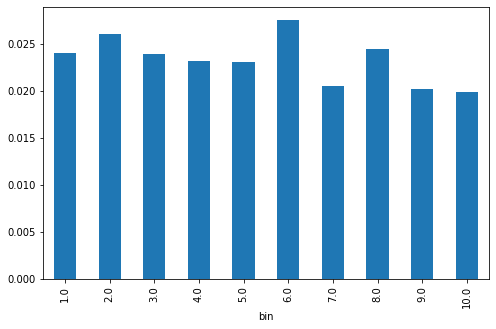

In [ ]:
ax = df.groupby('bin')['ret'].apply(np.mean).plot(kind='bar',figsize=(8,5))

In [ ]:
portfolios['bin'] = portfolios['bin'].apply(int)
portfolios2 = pd.merge(
portfolios[portfolios['bin']==1], portfolios[portfolios['bin']==10], suffixes=['_long', '_short'], on='date')


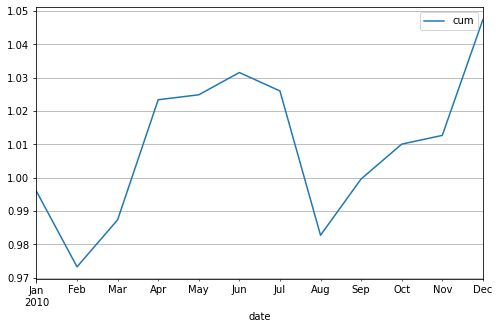

In [ ]:
portfolios2['strategy'] = portfolios2['portfolio_long'] - portfolios2['portfolio_short']
portfolios2['cum'] = (portfolios2['strategy'] + 1).cumprod() - 1
# 回测表现 portfolios2\
portfolios2.assign(date=pd.to_datetime(portfolios2['date'])).assign(cum=portfolios2['cum']+1).plot(x='date', y=['cum'],figsize=(8,5)).grid(axis='y')

In [ ]:
def sharpe(x):
    return x.mean() / x.std()
print('mean return: ', portfolios2['strategy'].mean())
print('sharpe ratio: ',sharpe(portfolios2['strategy']))

mean return:  0.004090021535744085
sharpe ratio:  0.18611319348640493


## 4. Economic restrictions
---

Yes. Since the effect of these economic restrictions is to filter out the relatively small stock while the small stocks are believed to perform better with this strategy which is resulted from the higher short-sale constraints of smaller stocks. 

In [ ]:
df1 = pd.read_parquet('msf_delisting_adjusted.parquet')
df1['year'] = df1['yearmonth'].apply(lambda x:str(x)[:4])
df1 = df1[(df1['prc']>5) & (df1['prc_lag1']>1)&(df1['year']=='2010') & ((df1['hexcd']==1)|(df1['hexcd']==2)|(df1['hexcd']==3))]

In [ ]:
df1 = df1.reset_index(drop=True)
df1['bin_vol'] = df1.groupby('date')['vol'].apply(lambda x: np.ceil(x.rank()/len(x)*5))
df1['bin_mcap'] = df1.groupby('date')['mcap'].apply(lambda x: np.ceil(x.rank()/len(x)*5))

In [ ]:
df1 = df1[(df1['bin_vol'] != 1.0)&(df1['bin_mcap']!=1.0)]

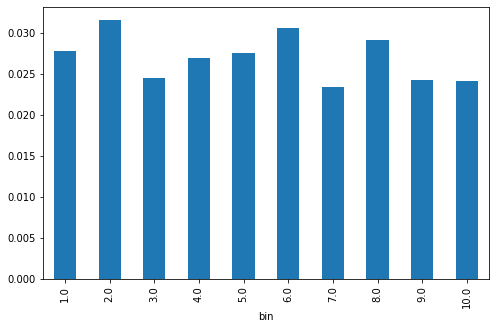

In [ ]:
df2 = pd.read_parquet('hw2_option_to_stock_volume_ratio.parquet')
df = df1.merge(df2,left_on=['date','permno'],right_on=['month_end','permno'],how='inner')
df['volume_ratio'] = df['option_volume']/df['vol']
df['volume_ratio_lag1'] = df['volume_ratio'].shift(1)
df = df[['permno','date','ret','volume_ratio_lag1']]
df = df[['permno','date','ret','volume_ratio_lag1']]
df['bin'] = df.groupby('date')['volume_ratio_lag1'].apply(lambda g:np.ceil(g.rank()/len(g)*10))
df = df.dropna()
portfolios = ( df
.groupby(['date', 'bin']) .apply(
lambda g: pd.Series({
'portfolio': g['ret'].mean()

}) )
).reset_index()
ax = df.groupby('bin')['ret'].apply(np.mean).plot(kind='bar',figsize=(8,5))

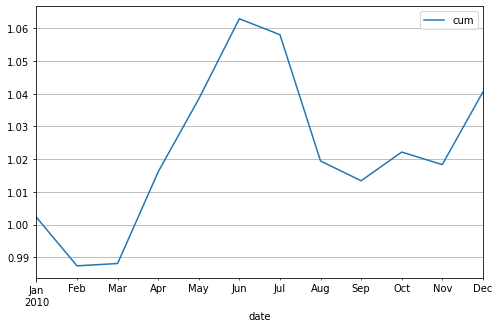

In [ ]:
portfolios['bin'] = portfolios['bin'].apply(int)
portfolios2 = pd.merge(
portfolios[portfolios['bin']==1], portfolios[portfolios['bin']==10], suffixes=['_long', '_short'], on='date')
portfolios2['strategy'] = portfolios2['portfolio_long'] - portfolios2['portfolio_short']
portfolios2['cum'] = (portfolios2['strategy'] + 1).cumprod() - 1
# 回测表现 portfolios2\
portfolios2.assign(date=pd.to_datetime(portfolios2['date'])).assign(cum=portfolios2['cum']+1).plot(x='date', y=['cum'],figsize=(8,5)).grid(axis='y')


In [ ]:
def sharpe(x):
    return x.mean() / x.std()
print('mean return: ', portfolios2['strategy'].mean())
print('sharpe ratio: ',sharpe(portfolios2['strategy']))

mean return:  0.002394466764050305
sharpe ratio:  0.13047915560983886


## 5. Risk analysis


In [ ]:
ff5 = pd.read_parquet('ff_five_factor_monthly.parquet')

In [ ]:
# regression to risk benchmark

ff5 = pd.read_parquet('ff_five_factor_monthly.parquet')\
    .groupby('month_end')\
    .apply(lambda g: (g+1).prod() - 1)\
    .reset_index()

ff5.head()

ports_with_ff5 = pd.merge(portfolios2, ff5, left_on='date',right_on='month_end',how='inner')

In [ ]:
import statsmodels.formula.api as smf
smf.ols('cum ~ 1 + hml + mkt_rf + smb + cma + rmw', data=ports_with_ff5).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cum   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     1.865
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.235
Time:                        15:29:13   Log-Likelihood:                 34.625
No. Observations:                  12   AIC:                            -57.25
Df Residuals:                       6   BIC:                            -54.34
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0041      0.008      0.506      0.631      -0.016       0.024
hml           -0.8631      0.388     -2.223      0.068      -1.813       0.087
mkt_rf        -0.1342      0.141     -0.953      0.378      -0.479       0.210
smb           -0.6840      0.408     -1.677      0.145      -1.682       0.314
cma            2.1555      1.007      2.141      0.076      -0.308       4.619
rmw            0.0574      0.691      0.083      0.937      -1.633       1.748
==============================================================================
Omnibus:                        1.041   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.770
Skew:                           0.548   Prob(JB):                        0.680
Kurtosis:                       2.418   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Update the analysis for the full sample period
---

The performance of the strategy plummeted in 2020. According to our analysis, it is due to the boom of stock option volume in 2020, resulting from the increased participation of individual investors, especially in call option. High call option volume resulted in high total option volume and thus high option-to-volume ratio. According to the strategy, we short the stocks with high option-to-volume ratio for the reason that it might indicate negative private information. However, a high option-to-volume ratio in 2020 might be indicator for the popularity of the stock and may instead bears positive information signal. Hence the strategy doesn't perform as well as previously anymore. 

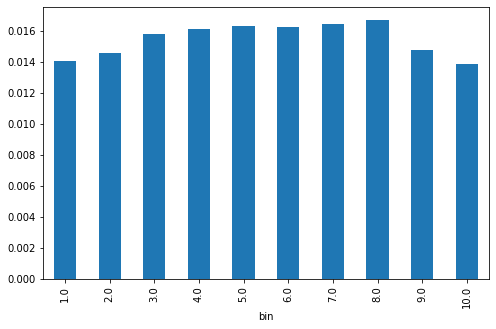

In [ ]:
df1 = pd.read_parquet('msf_delisting_adjusted.parquet')
df1['year'] = df1['yearmonth'].apply(lambda x:str(x)[:4])
df1['year'] = df1['year'].apply(lambda x:int(x))
df1 = df1[(df1['prc']>5) & (df1['prc_lag1']>1)&(df1['year']>2010) & ((df1['hexcd']==1)|(df1['hexcd']==2)|(df1['hexcd']==3))]

df1['bin_vol'] = df1.groupby('date')['vol'].apply(lambda x: np.ceil(x.rank()/len(x)*5)).reset_index(drop=True)
df1['bin_mcap'] = df1.groupby('date')['mcap'].apply(lambda x: np.ceil(x.rank()/len(x)*5)).reset_index(drop=True)

df1 = df1[(df1['bin_vol'] != 1.0)&(df1['bin_mcap']!=1.0)]
df2 = pd.read_parquet('hw2_option_to_stock_volume_ratio.parquet')
df = df1.merge(df2,left_on=['date','permno'],right_on=['month_end','permno'],how='inner')
df['volume_ratio'] = df['option_volume']/df['vol']
df['volume_ratio_lag1'] = df['volume_ratio'].shift(1)
df = df[['permno','date','ret','volume_ratio_lag1']]
df = df[['permno','date','ret','volume_ratio_lag1']]
df['bin'] = df.groupby('date')['volume_ratio_lag1'].apply(lambda g:np.ceil(g.rank()/len(g)*10))
df = df.dropna()
portfolios = ( df
.groupby(['date', 'bin']) .apply(
lambda g: pd.Series({
'portfolio': g['ret'].mean()

}) )
).reset_index()
ax = df.groupby('bin')['ret'].apply(np.mean).plot(kind='bar',figsize=(8,5))


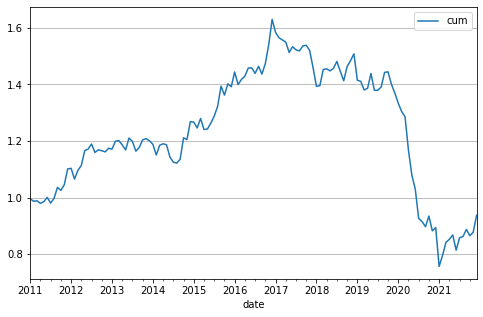

In [ ]:
portfolios['bin'] = portfolios['bin'].apply(int)
portfolios2 = pd.merge(
portfolios[portfolios['bin']==1], portfolios[portfolios['bin']==10], suffixes=['_long', '_short'], on='date')
portfolios2['strategy'] = portfolios2['portfolio_long'] - portfolios2['portfolio_short']
portfolios2['cum'] = (portfolios2['strategy'] + 1).cumprod() - 1
# 回测表现 portfolios2\
portfolios2.assign(date=pd.to_datetime(portfolios2['date'])).assign(cum=portfolios2['cum']+1).plot(x='date', y=['cum'],figsize=(8,5)).grid(axis='y')

In [ ]:
def sharpe(x):
    return x.mean() / x.std()
print('mean return: ', portfolios2['strategy'].mean())
print('sharpe ratio: ',sharpe(portfolios2['strategy']))

mean return:  5.996085953635439e-05
sharpe ratio:  0.0018229730696171908


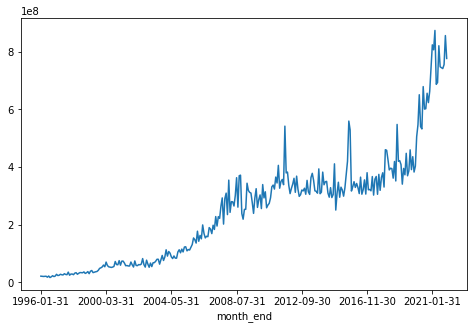

In [ ]:
df2.groupby('month_end')['option_volume'].sum().plot(figsize = (8,5))

## 7. Modulating the strategy to recover predictability
---

We believe what make the strategy not work is the increacing amount of the call option. So the the volitility is taken into consideration because the stock with higher volitility implies higher return, which may be the motivation for investors to use call option for leveraging the their investment, seeking higher return if their believed the stock will go upward. Here we consider the standard deviation of return as volitility. Volitility makes the option-volume ratio weaker for the strategy if it is large since the option-volume ratio is based on the thought of short-sale while higher volitility(larger amount of call options) will work against. The back testing seems better.

In [ ]:
df1 = pd.read_parquet('msf_delisting_adjusted.parquet')
df1['year'] = df1['yearmonth'].apply(lambda x:str(x)[:4])
df1['year'] = df1['year'].apply(lambda x:int(x))
df1 = df1[(df1['prc']>5) & (df1['prc_lag1']>1)&(df1['year']>2010) & ((df1['hexcd']==1)|(df1['hexcd']==2)|(df1['hexcd']==3))]

df1['bin_vol'] = df1.groupby('date')['vol'].apply(lambda x: np.ceil(x.rank()/len(x)*5)).reset_index(drop=True)
df1['bin_mcap'] = df1.groupby('date')['mcap'].apply(lambda x: np.ceil(x.rank()/len(x)*5)).reset_index(drop=True)

In [ ]:
df1 = df1[(df1['bin_vol'] != 1.0)]
df2 = pd.read_parquet('hw2_option_to_stock_volume_ratio.parquet')
df = df1.merge(df2,left_on=['date','permno'],right_on=['month_end','permno'],how='inner')

In [ ]:
df['volume_ratio'] = df['option_volume']/df['vol']
df['volume_ratio_lag1'] = df['volume_ratio'].shift(1)
df = df[['permno','date','ret','volume_ratio_lag1','bin_mcap','bin_vol']]
df['bin1'] = df.groupby('date')['volume_ratio_lag1'].apply(lambda g:np.ceil(g.rank()/len(g)*10))
temp = df.groupby('permno')['ret'].std().reset_index()
temp
df =  df.merge(temp,on='permno',how='left',suffixes=['','std'])
df['bin_std'] = df.groupby('date')['retstd'].apply(lambda g:np.ceil(g.rank()/len(g)*10))
df = df.dropna()

In [ ]:
# REbuild bin based on volitility and option-volume ratio
df['bin'] = df['bin1']-df['bin_std']
df['bin'] = df.groupby('date')['bin'].apply(lambda g:np.ceil(g.rank()/len(g)*3))
df.head()

,permno,date,ret,volume_ratio_lag1,bin_mcap,bin_vol,bin1,retstd,bin_std,bin
1,78829.0,2011-02-28,-0.018942,0.002317,3.0,4.0,1.0,0.084988,4.0,1.0
2,78829.0,2011-03-31,-0.058175,0.000202,2.0,4.0,1.0,0.084988,4.0,1.0
3,78829.0,2011-04-30,0.126723,0.000736,2.0,4.0,1.0,0.084988,4.0,1.0
4,78829.0,2011-05-31,0.013064,0.003349,2.0,4.0,2.0,0.084988,4.0,2.0
5,78829.0,2011-06-30,-0.013482,0.000000,2.0,4.0,1.0,0.084988,4.0,1.0


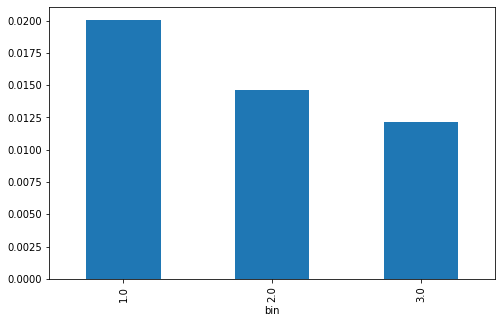

In [ ]:
portfolios = ( df
.groupby(['date', 'bin']) .apply(
lambda g: pd.Series({
'portfolio': g['ret'].mean()

}) )
).reset_index()
ax = df.groupby('bin')['ret'].apply(np.mean).plot(kind='bar',figsize=(8,5))

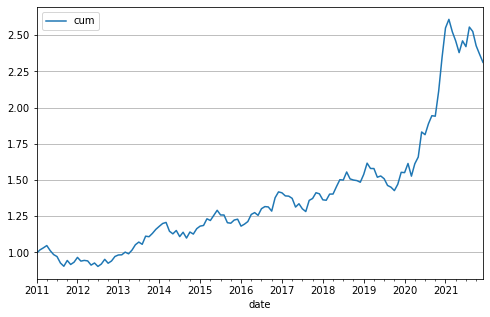

In [ ]:
portfolios['bin'] = portfolios['bin'].apply(int)
portfolios2 = pd.merge(
portfolios[portfolios['bin']==1], portfolios[portfolios['bin']==3], suffixes=['_long', '_short'], on='date')
portfolios2['strategy'] = portfolios2['portfolio_long'] - portfolios2['portfolio_short']
portfolios2['cum'] = (portfolios2['strategy'] + 1).cumprod() - 1
# 回测表现 portfolios2\
portfolios2.assign(date=pd.to_datetime(portfolios2['date'])).assign(cum=portfolios2['cum']+1).plot(x='date', y=['cum'],figsize=(8,5)).grid(axis='y')


In [ ]:
def sharpe(x):
    return x.mean() / x.std()
print('mean return: ', portfolios2['strategy'].mean())
print('sharpe ratio: ',sharpe(portfolios2['strategy']))

mean return:  0.006863214866275781
sharpe ratio:  0.2161752768274114
